In [ ]:
#example. classify images


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [3]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) =cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
#Look at the data types 
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(x_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
#Get the shape of the arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('x_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
x_test shape: (10000, 1)


In [ ]:
#Take a look at the first image as an array
index=10
x_train[index]


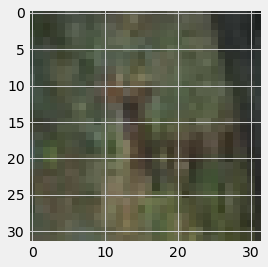

In [7]:
#Show the image as a picture
img = plt.imshow(x_train[index])


In [8]:
#Get the image label
print('The image label is:', y_train[index])



The image label is: [4]


In [9]:
#Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer',  'dog', 'frog', 'horse', 'ship', 'truck']
#Print the image class
print('The image class is:', classification[y_train[index][0]])

The image class is: deer


In [10]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


In [11]:
#Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
#Print the new label of the image/picture above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
#Normalize the pixels to be values between 0 and 1
x_train=x_train/255
x_test=x_test/255


In [14]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [15]:
#Create the models architecture
model = Sequential()

#Add the first layer
model.add(Conv2D(32,(5,5), activation='relu', input_shape=(32,32,3)))

#Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add another conv. layer
model.add(Conv2D(32,(5,5), activation='relu'))

#Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add a flattering  layer, reduces size
model.add(Flatten())

#Add a layer with 500 neurons
model.add(Dense(250,activation='relu'))
#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(150,activation='relu'))
#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 125 neurons
model.add(Dense(25,activation='relu'))

#Add a layer with 10 neurons
model.add(Dense(10,activation='softmax'))


In [16]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [17]:
#Train the model
hist=model.fit(x_train, y_train_one_hot, batch_size=10, epochs=5, validation_split = 0.2)

Epoch 1/5
4000/4000 [==============================] - 78s 19ms/step - loss: 1.9230 - accuracy: 0.2696 - val_loss: 1.5950 - val_accuracy: 0.4052
Epoch 2/5
4000/4000 [==============================] - 75s 19ms/step - loss: 1.6132 - accuracy: 0.4115 - val_loss: 1.5191 - val_accuracy: 0.4438
Epoch 3/5
4000/4000 [==============================] - 76s 19ms/step - loss: 1.5182 - accuracy: 0.4504 - val_loss: 1.4012 - val_accuracy: 0.4962
Epoch 4/5
4000/4000 [==============================] - 76s 19ms/step - loss: 1.4543 - accuracy: 0.4768 - val_loss: 1.3728 - val_accuracy: 0.5032
Epoch 5/5
4000/4000 [==============================] - 76s 19ms/step - loss: 1.4164 - accuracy: 0.4927 - val_loss: 1.4118 - val_accuracy: 0.4992


In [18]:
model.evaluate(x_test, y_test_one_hot)[1]


313/313 [==============================] - 4s 13ms/step - loss: 1.4224 - accuracy: 0.5011


0.5011000037193298

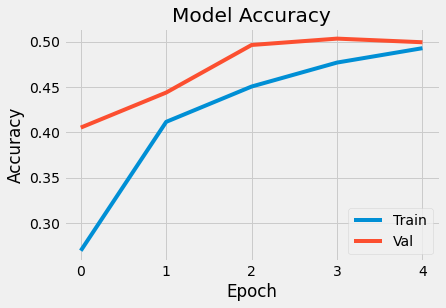

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

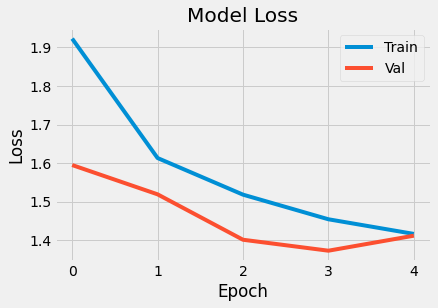

In [23]:
#Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [30]:
#Test the model with an example
from google.colab import files
uploaded=files.upload()


Saving Unknown-4 to Unknown-4


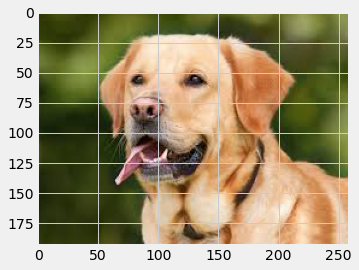

In [31]:
#show the image
new_image=plt.imread('Unknown-4')
img = plt.imshow(new_image)

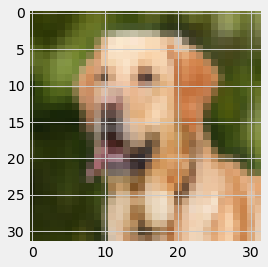

In [32]:
#resize the image
from skimage.transform import resize
resized_image=resize(new_image, (32,32,3))
img=plt.imshow(resized_image)

In [33]:
#get the model prediction
predictions=model.predict(np.array([resized_image]))
#Show the predictions
predictions

array([[0.00383265, 0.00181535, 0.08426602, 0.35209107, 0.10066582,
        0.2640819 , 0.10346287, 0.08315937, 0.00147504, 0.00514993]],
      dtype=float32)

In [34]:
#sort the prdictions from least to greatest
classification[np.argmax(predictions)]

'cat'